## Main Objective
> The primary goal of this project is to perform a comprehensive analysis of customer satisfaction to identify key factors influencing satisfaction and areas needing improvement!  

### Data Understanding
The dataset has the following features:
1. **CustomerID**: Unique identifier for each customer.
2. **Age**: Age of the customer.
3. **Gender**: Gender of the customer (Male/Female).
4. **PurchaseAmount**: Total amount spent by the customer.
5. **PurchaseFrequency**: Number of purchases made by the customer.
6. **ProductQualityRating**: Customer rating for product quality (1-5).
7. **DeliveryTimeRating**: Customer rating for delivery time (1-5).
8. **CustomerServiceRating**: Customer rating for customer service (1-5).
9. **WebsiteEaseOfUseRating**: Customer rating for website ease of use (1-5).
10. **ReturnRate**: Proportion of products returned by the customer.
11. **DiscountUsage**: Amount of discount used by the customer.
12. **LoyaltyProgramMember**: Whether the customer is a loyalty program member (Yes/No).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("datasets/E-commerce_NPA_Dataset.csv")

In [4]:
dataset.head()

,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage,LoyaltyProgramMember
0,1,38,Female,749.097626,24,2,1,3,5,0.12,135.392573,No
1,2,30,Male,735.224916,18,5,4,4,5,0.37,193.450663,Yes
2,3,55,Male,1145.520305,22,3,5,4,1,0.10,147.246263,Yes
3,4,39,Female,925.460535,14,4,3,2,4,0.38,56.362894,Yes
4,5,51,Male,108.359916,9,3,3,2,5,0.42,338.731055,No


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              500 non-null    int64  
 1   Age                     500 non-null    int64  
 2   Gender                  500 non-null    object 
 3   PurchaseAmount          500 non-null    float64
 4   PurchaseFrequency       500 non-null    int64  
 5   ProductQualityRating    500 non-null    int64  
 6   DeliveryTimeRating      500 non-null    int64  
 7   CustomerServiceRating   500 non-null    int64  
 8   WebsiteEaseOfUseRating  500 non-null    int64  
 9   ReturnRate              500 non-null    float64
 10  DiscountUsage           500 non-null    float64
 11  LoyaltyProgramMember    500 non-null    object 
dtypes: float64(3), int64(7), object(2)
memory usage: 47.0+ KB


In [6]:
dataset.isnull().sum()

CustomerID                0
Age                       0
Gender                    0
PurchaseAmount            0
PurchaseFrequency         0
ProductQualityRating      0
DeliveryTimeRating        0
CustomerServiceRating     0
WebsiteEaseOfUseRating    0
ReturnRate                0
DiscountUsage             0
LoyaltyProgramMember      0
dtype: int64

In [7]:
dataset.describe()

,CustomerID,Age,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.0000,500.000000,500.000000,500.000000
mean,250.500000,44.170000,1065.050731,14.308000,2.93400,3.008000,3.0780,3.082000,0.252280,251.181010
std,144.481833,14.813777,583.199658,8.151197,1.41054,1.372481,1.4156,1.415374,0.149674,141.531993
min,1.000000,18.000000,51.799790,1.000000,1.00000,1.000000,1.0000,1.000000,0.000000,0.772696
25%,125.750000,32.000000,535.083407,7.000000,2.00000,2.000000,2.0000,2.000000,0.110000,133.672231
50%,250.500000,44.000000,1100.884065,14.000000,3.00000,3.000000,3.0000,3.000000,0.260000,251.940355
75%,375.250000,58.000000,1584.348124,22.000000,4.00000,4.000000,4.0000,4.000000,0.380000,371.692341
max,500.000000,69.000000,1999.655968,29.000000,5.00000,5.000000,5.0000,5.000000,0.500000,499.813315


## Exploratory Data Analysis
### How is overall customer satisfaction distributed across ProductQualityRating, DeliveryTimeRating, CustomerServiceRating, and WebsiteEaseOfUseRating?

In [8]:
rating_features = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']

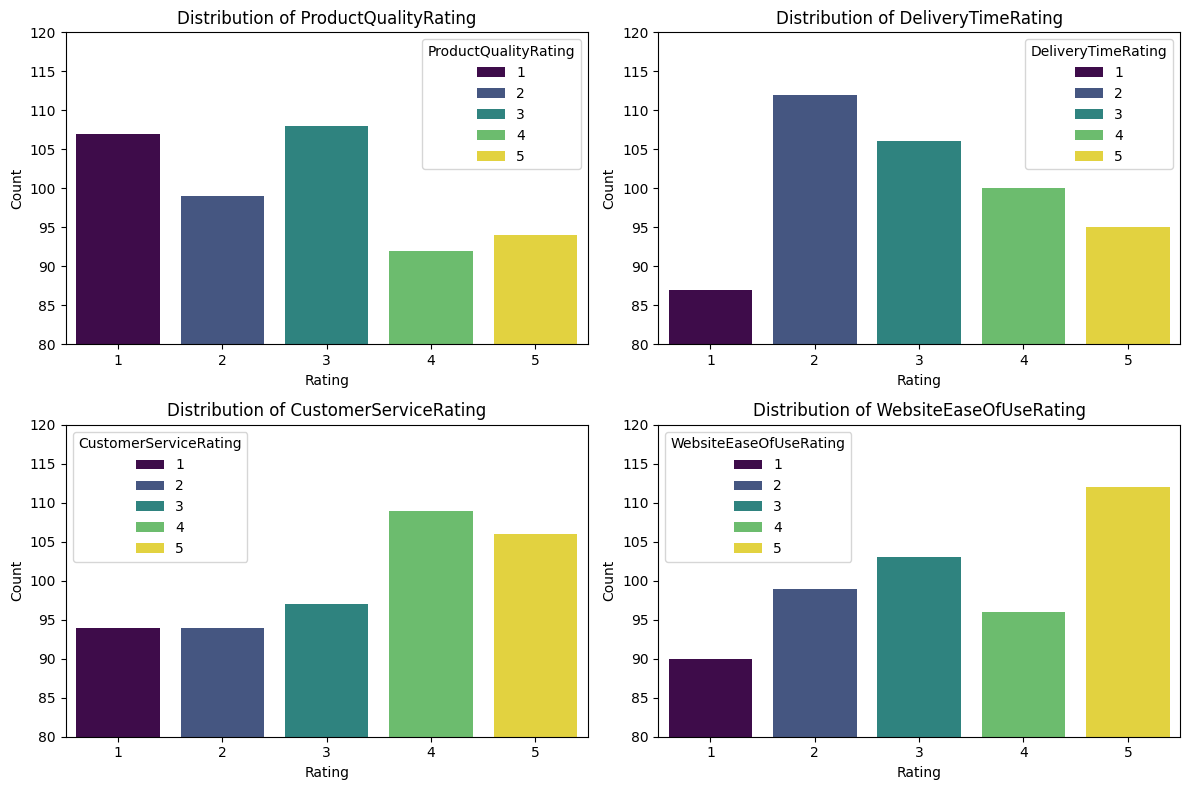

In [9]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(rating_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=dataset, hue=dataset[feature], palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Rating')
    plt.ylim(80, 120)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

**ProductQualityRating**  
1. The distribution is fairly balanced, but slightly skewed toward the lower-middle ratings (1–3).
2. The most common rating is 3, suggesting customers are moderately satisfied with product quality.
3. Fewer customers gave a 4 or 5, which may indicate room for improvement in product quality.

**DeliveryTimeRating**  
1. The most frequent rating is 2, which is relatively low.
2. This suggests delivery time might be a pain point for customers.
3. The distribution is left-skewed (more low ratings), indicating dissatisfaction with delivery speed or reliability.

**CustomerServiceRating**
1. This distribution is right-skewed (more high ratings).
2. Most customers rate customer service as 4 or 5, which is a strong positive signal.
3. It suggests that customer service is a relative strength of the business.

**WebsiteEaseOfUseRating**
1. This is the most balanced distribution, with a slight peak at rating 5.
2. Indicates that the website is generally easy to use, with a good number of customers giving it top marks.
3. Still, a non-negligible number of users gave it a 1 or 2, so there may be usability issues for some segments.

### How does Age affect different satisfaction dimensions?

In [10]:
# Creating age groups
ageBins = [18, 30, 40, 50, 60, 70]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70']
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=ageBins, labels=labels)

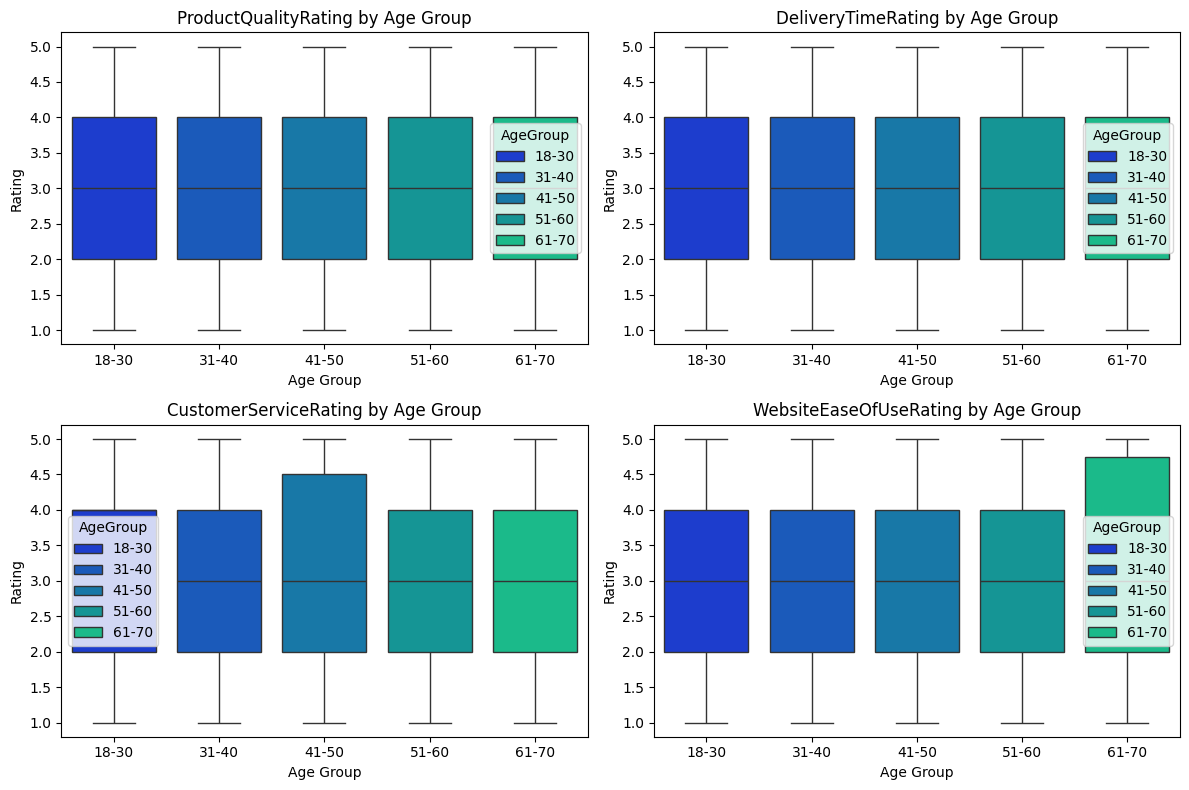

In [11]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(rating_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='AgeGroup', y=feature, data=dataset, hue='AgeGroup', palette='winter')
    plt.title(f'{feature} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Rating')
plt.tight_layout()
plt.show()

> Across all four satisfaction dimensions, the median rating (Q2) is consistently around 3.0 for every age group. This suggests:
1. No strong age-based preference or dissatisfaction in how customers rate product quality, delivery, service, or website usability.
2. The customer base, regardless of age, tends to feel “neutral” or “average” about these aspects.
3. Age is not a strong predictor of satisfaction in your dataset.
4. However, the spread in some age groups suggests experience inconsistency, not necessarily dissatisfaction.

### Are there gender differences in satisfaction ratings?

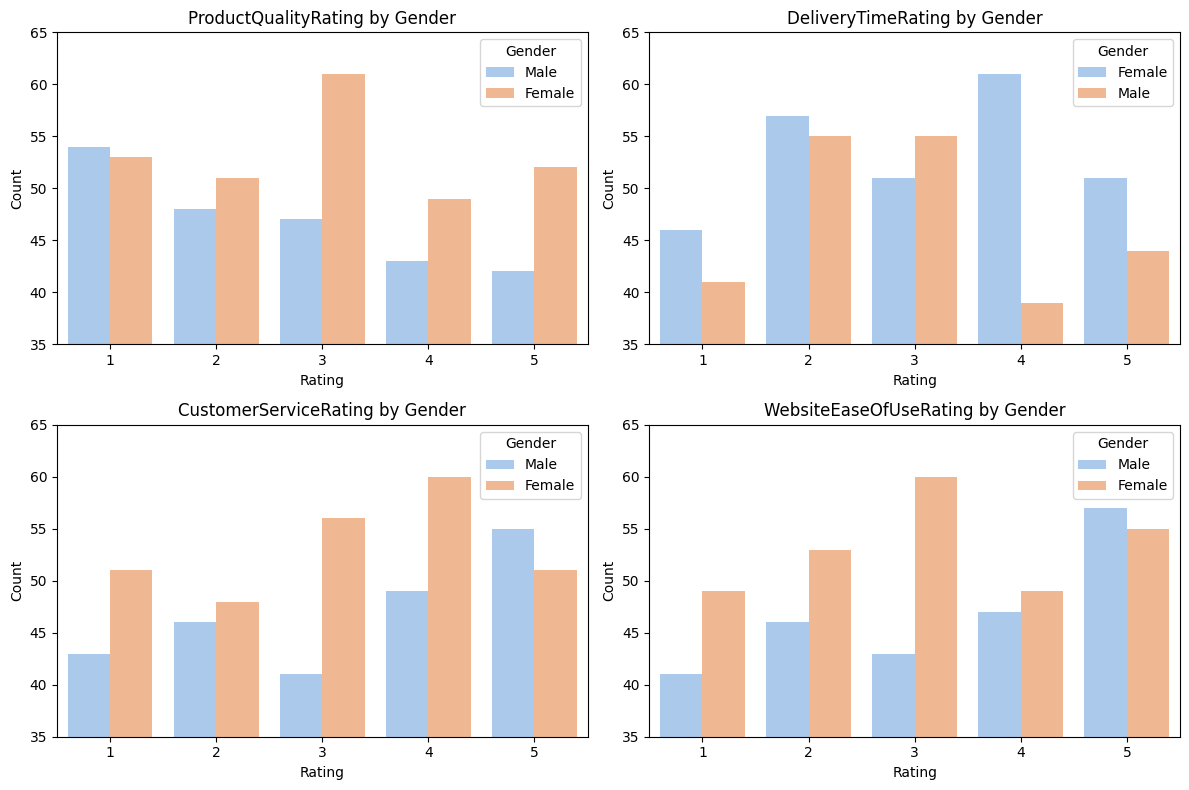

In [18]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(rating_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=dataset, x=feature, hue='Gender', palette='pastel')
    plt.title(f'{feature} by Gender')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.ylim(35, 65)
    plt.legend(title='Gender')
plt.tight_layout()
plt.show()

| Rating Dimension       | Pattern Across Genders                              | Implication for Satisfaction Analysis             |
|------------------------|------------------------------------------------------|---------------------------------------------------|
| Product Quality        | Females rate higher overall                          | Females appear slightly more satisfied            |
| Delivery Time          | Females rate 4 more often                            | Delivery favors female experience                 |
| Customer Service       | More variation; males lead at rating 5              | Mixed feedback, possibly segmented preferences    |
| Website Ease of Use    | Females rate low and mid more, males rate 5         | UX might better suit male users                   |  


> Female customers tend to give higher ratings for product quality and delivery time, suggesting they find those aspects more satisfactory.  
> For customer service, males and females diverge more, with males slightly more polarized toward higher ratings.  